<a href="https://colab.research.google.com/github/Birjesh786/Deep-Learning-Activation-Functions/blob/main/Sigmoid_Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [8]:
# Load the dataset
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

data.rename(columns={'v1': 'label', 'v2': 'text'}, inplace=True)

data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [9]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [11]:
# Convert text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [12]:
# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [13]:
# Predict labels for the test set
y_pred = model.predict(X_test)

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [15]:
!pip install matplotlib scikit-learn

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [17]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [18]:
# Create a function to plot the confusion matrix
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = range(len(labels))
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

In [19]:
# Define class labels (0 for not spam, 1 for spam)
class_labels = [0, 1]

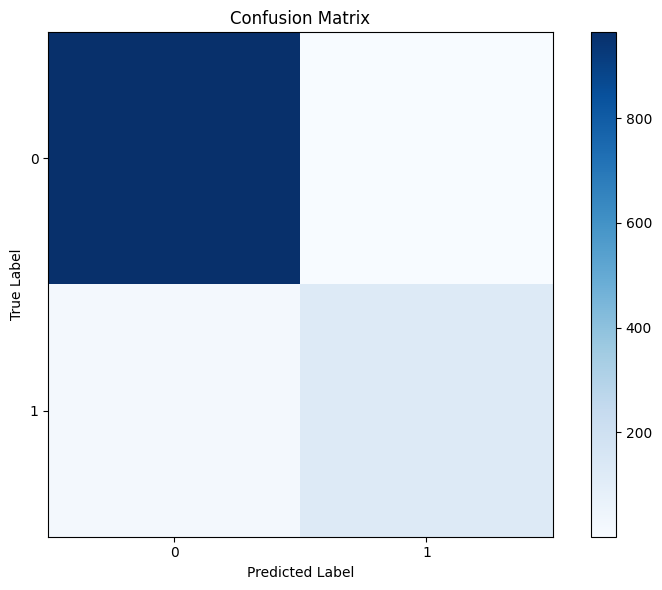

In [20]:
# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, labels=class_labels)
plt.show()

In [22]:
# Map 'ham' to 0 and 'spam' to 1 in y_test
y_test_binary = y_test.map({'ham': 0, 'spam': 1})

In [23]:
# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

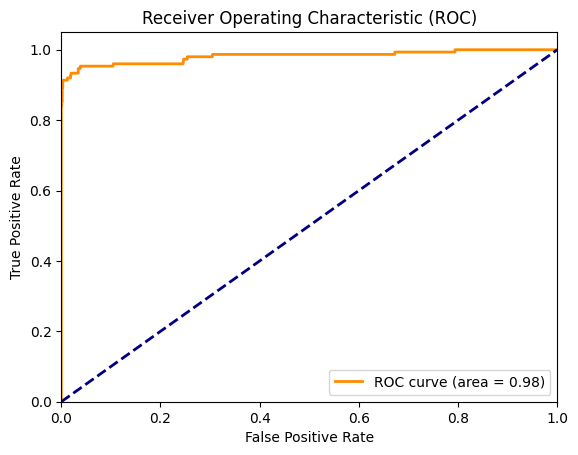

In [24]:
# Create an ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()